In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
from scipy.stats import norm, t
import statsmodels.api as sm

In [3]:
# Problem 1
# Proving skewness and kurtosis functions in scipy is biased or not
# generating random data following normal distribution
def compare_skew_kurt(n):
    '''
    n is the number of data points, in this way, we can compare the performance when n approches infinity to find out 
    if the scipy function is biased or not
    '''
    data = np.random.normal(0, 1, n)
    # calculate skewness and kurtosis by scipy
    skewness_scipy = stats.skew(data)
    print("when n=",len(data)," the Skewness by function:", skewness_scipy)
    # because the the kurtosis function in scipy.stats uses a different normalization than the one in excel 
    # it returns excess kurtosis, that is the kurtosis of the data minus 3
    kurt_scipy = stats.kurtosis(data)
    print("when n=",len(data)," the Kurtosis by function:", kurt_scipy+3)

    #calculating skewess and kurtosis by hand
    mean = np.mean(data)
    std = np.std(data)
    skewness_hand = np.sum((data - mean)**3) / (len(data) * std**3)
    print("when n=",len(data)," the Skewness by hand:", skewness_hand)
    kurt_hand = np.sum((data - mean)**4) / (len(data) * std**4)
    print("when n=",len(data)," the Skewness by hand:", kurt_hand)
    
    #comparing the results
    print("Skewness difference:", skewness_scipy - skewness_hand)
    print("Kurtosis difference:", kurt_scipy - kurt_hand+3)

n = [100, 500, 1000]
for i in n:
    compare_skew_kurt(i)


when n= 100  the Skewness by function: -0.18228321437425338
when n= 100  the Kurtosis by function: 2.7345641275230625
when n= 100  the Skewness by hand: -0.18228321437425343
when n= 100  the Skewness by hand: 2.734564127523062
Skewness difference: 5.551115123125783e-17
Kurtosis difference: 4.440892098500626e-16
when n= 500  the Skewness by function: -0.19819337483554447
when n= 500  the Kurtosis by function: 2.882788112081306
when n= 500  the Skewness by hand: -0.19819337483554453
when n= 500  the Skewness by hand: 2.8827881120813066
Skewness difference: 5.551115123125783e-17
Kurtosis difference: -4.440892098500626e-16
when n= 1000  the Skewness by function: -0.009009133223947984
when n= 1000  the Kurtosis by function: 3.1412629458999697
when n= 1000  the Skewness by hand: -0.009009133223947984
when n= 1000  the Skewness by hand: 3.141262945899971
Skewness difference: 0.0
Kurtosis difference: -1.3322676295501878e-15


In [193]:
#Problem 2
#Fit the data in problem2.csv using OLS and calculate the error vector.  Look at its distribution.
#How well does it fit the assumption of normally distributed errors?
#import packages

#Step 1: read the data
data = pd.read_csv("Question/problem2.csv")
X = data.iloc[:, 0:1].values
Y = data.iloc[:, 1:].values
X = sm.add_constant(X)
#Step2: fit the data using OLS
model = sm.OLS(Y, X).fit()
residual = model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           4.34e-06
Time:                        23:43:33   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.325      -0.120       0.360
x1             0.6052      0.124      4.867      0.000       0.358       0.852
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.673
Skew:                          -0.267   Prob(JB):                     3.28e-10
Kurtosis:                       6.193   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to MOM estimation
The mean of the residual is: -2.1094237467877975e-17
The standard deviation of the residual is: 1.1983941277418964


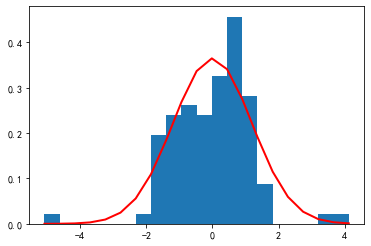

In [211]:
X = data.iloc[:, 0:1].values
# Plot the normal distribution
count, bins, ignored = plt.hist(residual, 20, density=True)
# Using MOM estimation
mean = np.mean(residual)
sigma = np.std(residual)
plt.plot(bins, 1/(1 * np.sqrt(2 * sigma * np.pi)) *
         np.exp( - (bins-mean)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

print("According to MOM estimation")
print("The mean of the residual is:", mean)
print("The standard deviation of the residual is:", sigma)
plt.show()

In [195]:
# Use Shapiro-Wilk test
stat, p = stats.shapiro(residual)
print(p)
# p value is less than 0.05, so we reject the null hypothesis that the data is normally distributed

0.00015389148029498756


In [196]:
#Fit the data with MLE using the assumption of a normal distribution of the errors.
# define the likelihood function with the assumption that the error is normally distributed
from scipy.stats import norm, t
def norm_cost_function(param, X, Y):
    k = param[0]
    b = param[1]
    sigma = param[2]
    error_dist = norm(0, sigma)
    error = Y - b - k * X
    ll = -np.log(error_dist.pdf(error)).sum()
    return ll

X = data.iloc[:, 0:1].values
Y = data.iloc[:, 1:].values
# initial value of params
init_params = np.array([1, 1, 1])
result1 = minimize(norm_cost_function, init_params, args=(X, Y),method='BFGS')
result1

      fun: 159.99209668916257
 hess_inv: array([[ 1.53886091e-02, -1.08753534e-04, -2.99815571e-04],
       [-1.08753534e-04,  1.41692783e-02, -5.74141070e-05],
       [-2.99815571e-04, -5.74141070e-05,  7.45495890e-03]])
      jac: array([ 3.81469727e-06,  0.00000000e+00, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.60520489, 0.11983619, 1.19839409])

In [197]:
# Fit the data with MLE using the assumption of a T distribution of the errors.

from scipy import special

# define the log-likelihood function with the assumption that the error is T-distributed
def t_cost_function(param, X, Y):
    k = param[0]   
    b = param[1]
    d_f = param[2]
    scale = param[3]
    error_dist = t(d_f, scale)
    error = Y - b - k * X
    ll = -np.log(error_dist.pdf(error)).sum()
    return ll

X = data.iloc[:, 0:1].values
Y = data.iloc[:, 1:].values

# initial value of params
init_params = np.array([1, 1, 1, 1])

result2 = minimize(t_cost_function, init_params, args=(X, Y), method='BFGS')
result2

      fun: 155.51528727591543
 hess_inv: array([[ 1.43130881e-02,  9.74927203e-04,  1.13352275e-02,
         9.74927203e-04],
       [ 9.74927203e-04,  5.03346390e-01, -1.11401232e-02,
        -4.96653610e-01],
       [ 1.13352275e-02, -1.11401232e-02,  7.74631007e+00,
        -1.11401232e-02],
       [ 9.74927203e-04, -4.96653610e-01, -1.11401232e-02,
         5.03346390e-01]])
      jac: array([-7.62939453e-06, -7.62939453e-06,  5.72204590e-06, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 13
     njev: 15
   status: 0
  success: True
        x: array([0.5589305 , 0.06998057, 6.7573985 , 0.06998057])

In [198]:
# Comparing them using AIC and BIC


k_norm = result1.x[0]
b_norm = result1.x[1]
y_norm = k_norm * X + b_norm

k_t = result2.x[0]
b_t = result2.x[1]
y_t = k_t * X + b_t

# Method 1 SSE
SSE1 = np.sum((Y - y_norm)**2)
SSE2 = np.sum((Y - y_t)**2)
print("SSE for norm:", SSE1)
print("SSE for t:", SSE2)

# Method 2 AIC 
AIC1 = 2 * len(result1.x) - 2 * (-result1.fun)
AIC2 = 2 * len(result2.x) - 2 * (-result2.fun)
print("AIC for norm:", AIC1)
print("AIC for t:", AIC2)

# Method3 BIC
BIC1 = len(result1.x) * np.log(len(Y)) - 2 * (-result1.fun)
BIC2 = len(result2.x) * np.log(len(Y)) - 2 * (-result2.fun)
print("BIC for norm:", BIC1)
print("BIC for t:", BIC2)


SSE for norm: 143.6148485406266
SSE for t: 144.06627281732415
AIC for norm: 325.98419337832513
AIC for t: 319.03057455183085
BIC for norm: 333.7997039362894
BIC for t: 329.4512552957832


In [199]:
#What are the fitted parameters of each and how do they compare?  What does this tell us about
#the breaking of the normality assumption in regards to expected values in this case?
print("the k in OLS = ", 0.6052)
print("the b in OLS = ", 0.1198)
print("the k in MLE with normal distribution = ", k_norm)
print("the b in MLE with normal distribution = ", b_norm)
print("the k in MLE with T distribution = ", k_t)
print("the b in MLE with T distribution = ", b_t)

the k in OLS =  0.6052
the b in OLS =  0.1198
the k in MLE with normal distribution =  0.6052048882824387
the b in MLE with normal distribution =  0.11983619162658825
the k in MLE with T distribution =  0.5589304973270935
the b in MLE with T distribution =  0.06998057376341564


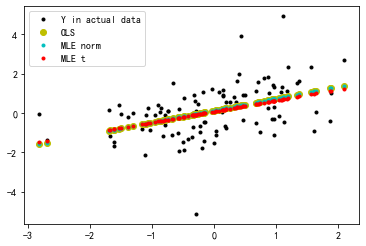

In [212]:
# Plot the OLS, MLE normal and MLE t fitting results.
y_OLS = 0.6052 * X + 0.1198
plt.figure()
plt.plot(X, Y, 'k.', label='Y in actual data')
plt.plot(X, y_OLS, 'yo', label='OLS')
plt.plot(X, y_norm, 'c.', label='MLE norm')
plt.plot(X, y_t, 'r.', label='MLE t')
plt.legend()
plt.show()

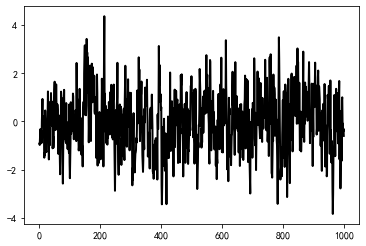

AR1


/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


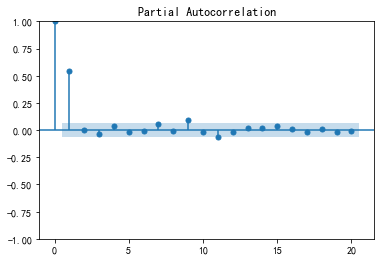

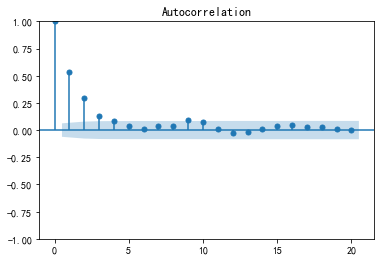

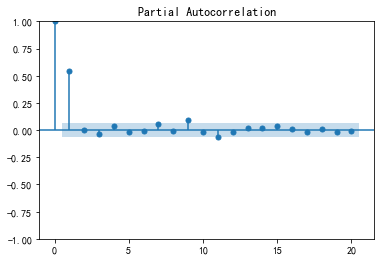

In [74]:
#Problem 3
#Simulate AR(1) through AR(3) and MA(1) through MA(3) processes.  Compare their ACF and
#PACF graphs.  How do the graphs help us to identify the type and order of each process?


#Step 1: Simulate AR(1) through AR(3)
# We set the coef and number of samples
# We initialize the first value of the process
# We use a for loop to generate the rest of the process
#AR(1)
coef = 0.5
n_samples = 1000
ar_process1 = np.zeros(n_samples)
ar_process1[0] = np.random.normal()
for i in range(1, n_samples):
    ar_process1[i] = coef * ar_process1[i-1] + np.random.randn()

plt.plot(ar_process1, linewidth=2, color='k')
plt.show()

# AR(1)
print("AR1")
plot_acf(ar_process1, lags=20)
plot_pacf(ar_process1, lags=20)

AR2


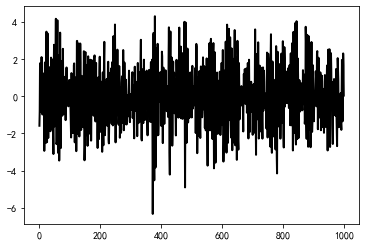

/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


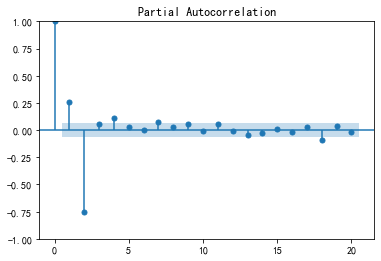

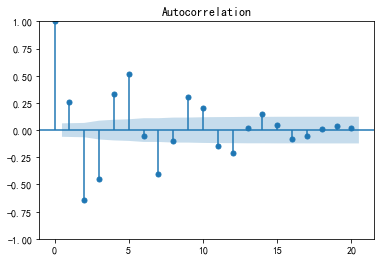

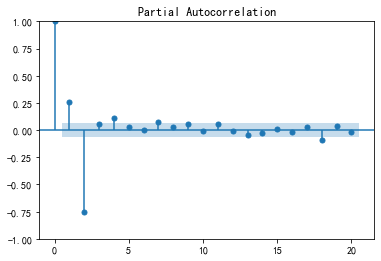

In [78]:
# AR(2)
print("AR2")
coef = [0.4,-0.5]
n_samples = 1000
ar_process2 = np.zeros(n_samples)
ar_process2[:2] = np.random.normal(size = 2)
for i in range(2, n_samples):
    ar_process2[i] = coef[0]*ar_process2[i-1]+coef[1]*ar_process2[i-2] + np.random.randn()
    
plt.plot(ar_process2, linewidth=2, color='k')
plt.show()
plot_acf(ar_process2, lags=20)
plot_pacf(ar_process2, lags=20)

AR3


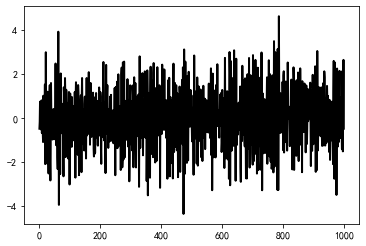

/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


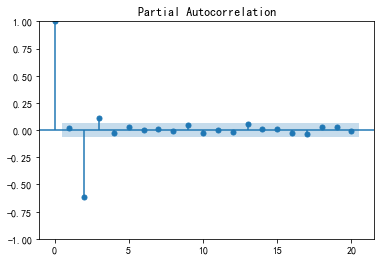

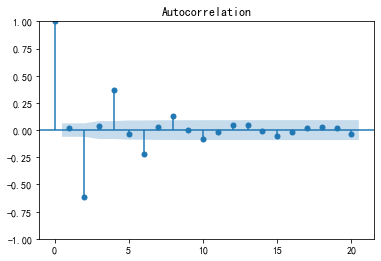

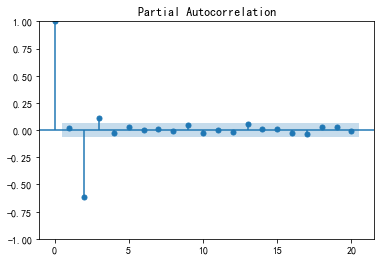

In [69]:
# AR(3)
print("AR3")
#AR(3)
coef = [0.1,-0.6,0.1]
n_samples = 1000
ar_process3 = np.zeros(n_samples)
ar_process3[:3] = np.random.normal(size = 3)
for i in range(3, n_samples):
    ar_process3[i] = coef[0]*ar_process3[i-1]+coef[1]*ar_process3[i-2] + coef[2]*ar_process3[i-3] + np.random.randn()

plt.plot(ar_process3, linewidth=2, color='k')
plt.show()

plot_acf(ar_process3, lags=20)
plot_pacf(ar_process3, lags=20)

MA1


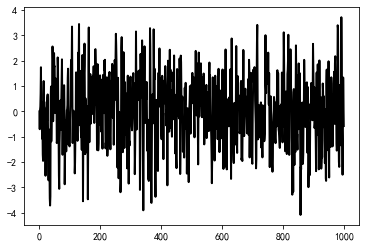

/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


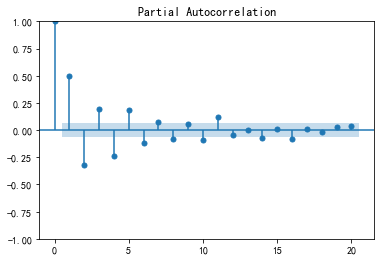

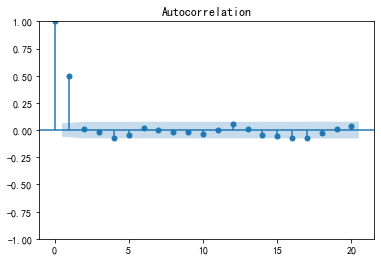

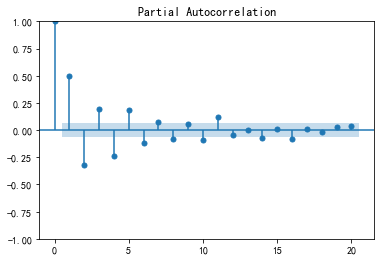

In [53]:
#Simulate MA models
#MA(1)
print("MA1")
# Set the parameters for the MA(1) process
mu = 0  # The mean of the process
theta = 0.9  # The parameter of the MA(1) process
sigma = 1  # The standard deviation of the error term
n_samples = 1000
errors = np.random.normal(loc=0, scale=sigma, size=n_samples)
ma1 = np.zeros(n_samples)
for t in range(1, n_samples):
    ma1[t] = mu + theta * errors[t-1] + errors[t]

plt.plot(ma1, linewidth=2, color='k')
plt.show()
plot_acf(ma1, lags=20)
plot_pacf(ma1, lags=20)


MA2


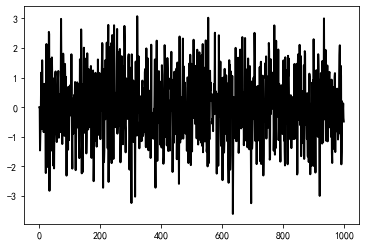

/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


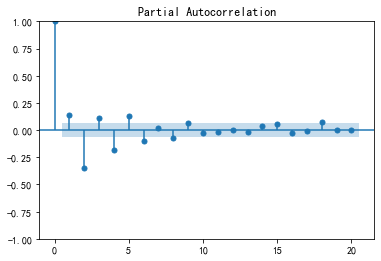

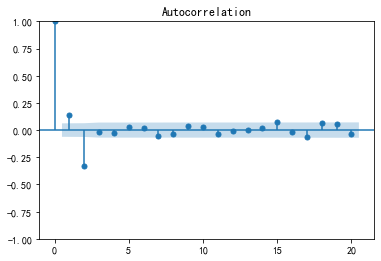

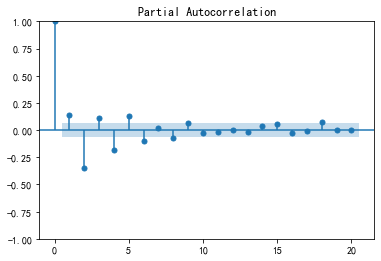

In [56]:
# MA2
print("MA2")
mu = 0  # The mean of the process
theta1 = 0.3  # The first parameter of the MA(2) process
theta2 = -0.4  # The second parameter of the MA(2) process
sigma = 1  # The standard deviation of the error term
n_samples = 1000
errors = np.random.normal(loc=0, scale=sigma, size=n_samples)
ma2 = np.zeros(n_samples)
for t in range(2, n_samples):
    ma2[t] = mu + theta1 * errors[t-1] + theta2 * errors[t-2] + errors[t]
plt.plot(ma2, linewidth=2, color='k')
plt.show()
plot_acf(ma2, lags=20)
plot_pacf(ma2, lags=20)

MA3


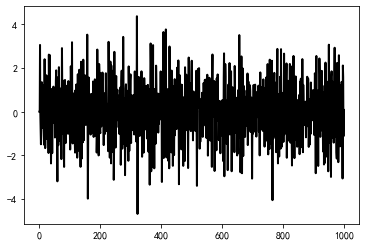

/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


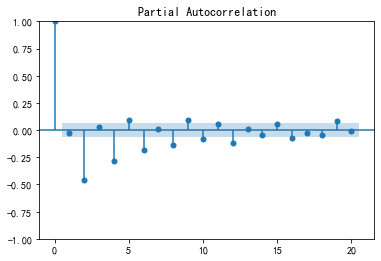

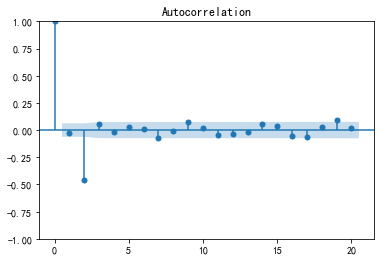

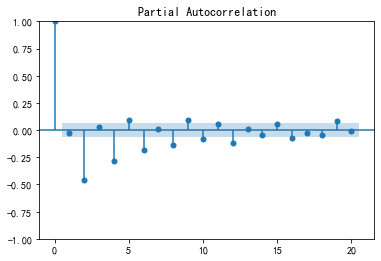

In [67]:
# MA3
print("MA3")
mu = 0  # The mean of the process
theta1 = 0.1  # The first parameter of the MA(3) process
theta2 = -0.7  # The second parameter of the MA(3) process
theta3 = 0.1 # The third parameter of the MA(3) process
sigma = 1  # The standard deviation of the error term
n_samples = 1000
errors = np.random.normal(loc=0, scale=sigma, size=n_samples)
ma3 = np.zeros(n_samples)
for t in range(2, n_samples):
    ma3[t] = mu + theta1 * errors[t-1] + theta2 * errors[t-2] + theta3 * errors[t-3] + errors[t]
plt.plot(ma3, linewidth=2, color='k')
plt.show()
plot_acf(ma3, lags=20)
plot_pacf(ma3, lags=20)